In [1]:
import numpy as np
import matplotlib.pyplot as plt

round[001]:{theta: [ 43.79435391  13.37648132  11.78442154  10.19757583 -11.14653754
   9.54478995], diff: 39682.43845, error: 153303.64929}
round[002]:{theta: [ 81.09175534  21.02401742  18.98701506  18.06570407 -17.59605302
  -3.86717608], diff: 29780.56019, error: 123523.08909}
round[003]:{theta: [114.52707285  31.7718076   31.48899829  31.82011017 -26.43785796
  -9.38933187], diff: 23388.17431, error: 100134.91478}
round[004]:{theta: [144.57101817  23.21731579  21.63394858  21.28458353 -20.32548073
  -1.80715657], diff: 17210.01234, error: 82924.90244}
round[005]:{theta: [171.72644538  23.84402051  20.91409609  19.25903359 -18.85787488
   3.24561211], diff: 14554.30682, error: 68370.59562}
round[006]:{theta: [196.41986532  29.93986591  25.15955298  21.34926672 -12.78401289
   6.16278356], diff: 13038.68303, error: 55331.91259}
round[007]:{theta: [220.31601448  33.49058759  29.64269761  26.11090596  -1.06297971
  -1.68974711], diff: 11243.63888, error: 44088.27371}
round[008]:{theta

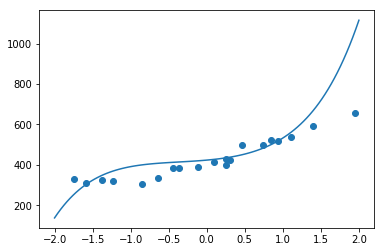

In [10]:
# load raw data
train=np.loadtxt('click.csv',delimiter=',',dtype='int',skiprows=1)
train_x=train[:,0]
train_y=train[:,1]

# multiple regression by SGD

# set axis
axis=6

# transform train_x to a matrix of multiple vars
def to_fake_multiple(x):
    tmp=[np.ones(len(x))]
    for a in range(1,axis):
        tmp.append(x**a)
    return np.array(tmp,dtype=np.float32).T
train_multiple=to_fake_multiple(train_x)

# standardization of the multiple vars
mu=[]
for i in range(axis):
    mu.append(train_multiple[:,i].mean())
sigma=[]
for i in range(axis):
    sigma.append(train_multiple[:,i].std())
def to_zscore(x):
    x=np.copy(x)
    for i in range(1,axis):
        x[:,i]=(x[:,i]-mu[i])/sigma[i]
    return x
zscore_multiple=to_zscore(train_multiple)

# init params
theta=np.random.rand(axis)

# prediction function
def predict(x):
    return np.dot(x,theta)

# error function of OLS
def erf(x,y):
    return (1/x.shape[0])*np.sum((y-predict(x))**2)

# iteration to minimize the error
eta=0.01
diff=1
round=0
error=erf(zscore_multiple,train_y)
while diff>0.1:
    round+=1
    # random selections
    pos=np.random.permutation(zscore_multiple.shape[0])[0:10]
    # update theta
    for x,y in zip(zscore_multiple[pos,:],train_y[pos]):
        theta=theta-eta*(predict(x)-y)*x
    # caculate diff
    current_error=erf(zscore_multiple,train_y)
    diff=error-current_error
    error=current_error
    print('round[%03d]:{theta: %s, diff: %.5f, error: %.5f}'%(round,str(theta),diff,error))
plt.scatter(zscore_multiple[:,1],train_y)
x=np.linspace(-2,2,100)
x=to_fake_multiple(x)
plt.plot(x[:,1],predict(x))
plt.show()